### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


# Assignment 3: Classification with Logistic Regression [ __ /100 marks]

In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database.

We will use logistic regression to predict whether subjects have diabetes or not.


## Global Toolbox


In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0


## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame.


In [40]:
# ****** your code here ******
df = pd.read_csv('diabetes.csv')
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?


**Your answer**:
There are 2 classes. Whether subjects have diabetes or they do not have diabetes. There are 8 features available to predict this outcome.


(2) Is the dataset class-balanced?


In [41]:
# ****** your code here ******
count = df['Outcome'].value_counts()
print(count)


Outcome
0    500
1    268
Name: count, dtype: int64


**Your answer**:
The dataset is not class balanced because the count of subjects with diabetes is 268 while the count of subjects without diabetes is 500.


(3) For this classification problem, what is the baseline accuracy and how would you interpret it? Round into 3 decimal place.


In [42]:
# ****** your code here ******

# round to 3 decimal places
baseline_accuracy = 1 - count[1]/(count[0]+count[1])
baseline_accuracy = round(baseline_accuracy, 3)

print("Baseline Accuracy is:", baseline_accuracy)

# interpret the result (rounded to 3 decimal places)
print("This means that if we were to predict that a patient does not have diabetes, we would be correct 65.1% of the time.")


Baseline Accuracy is: 0.651
This means that if we were to predict that a patient does not have diabetes, we would be correct 65.1% of the time.


## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.


In [43]:
# Store all the features into variable "X"
X = df.iloc[:,0:8]

# Store the output class values into variable "y" 
y = df.iloc[:,8]

# Split your X and y data using train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default? If yes, what penalty?

**Your answer**: The default penalty is L2 regularization.

(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients (parameters), relative to not applying a penalty during learning?

**Your answer**: The difference in the resulting parameters is large because without a penalty parameters would be very large as they grow to optimize the solution and so there can be infite number of solutions to model where as when we normalize we make the parameters smaller by penalizing them so that they have smaller growth magnitude and are computationally lighter. This allows parameters to avoid over fitting the dataset which has noise and if this model was used on the general population it may be worse performing than one that limits parameters from growing so large.

(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**: Yes you do because the default penalty will penalize the intercept and if we don't include one prior then their will be calculation errors.


## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.


/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


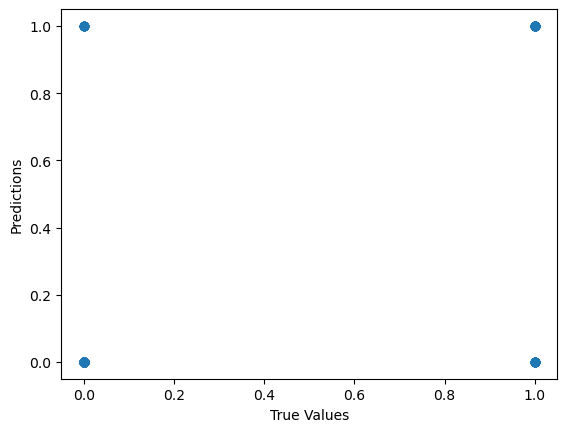

/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Outcome'>

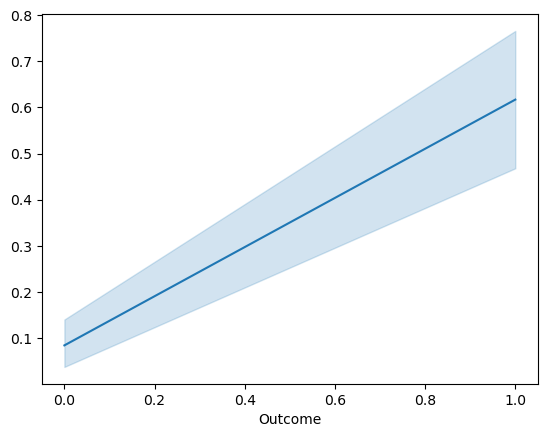

In [47]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
logreg = LogisticRegression(penalty='none' , max_iter=1000, random_state=seed)

# Obtain training data and test data
# ****** your code here ******  
logreg.fit(X_train, y_train)

# Predict the testing data



# Fit to your training data using Logistic Regression 
# ****** your code here ******
y_pred = logreg.predict(X_test)

# Create a scatter plot of the test data. 
# ****** your code here ******
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector x
sns.lineplot(x=y_test, y=y_pred)


## Question 2.3 [ _ /10 marks]

Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.


In [ ]:
# ****** your code here ******
# You can either write a function or not



## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.


In [ ]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******


# Fit to your training data using Logistic Regression 
# ****** your code here ******


# Compute your test predictions, given test inputs 
# ****** your code here ******


# Evaluate the performance
# ****** your code here ******


Does using more features help to improve the classification?

**Your answer** :


## Question 3.2 [ _ /10 marks]

Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.


In [ ]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.4


# Evaluate the performance
# ****** your code here ******


In [ ]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.6



# Evaluate the performance
# ****** your code here ******


What do you think is a better threshold?

**Your answer**:


## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.


In [ ]:
# Create a LogisticRegression model with l2 regularization 
# ****** your code here ******


# Fit to your training data using Logistic Regression 
# ****** your code here ******

# Compute your test predictions, given test inputs 
# ****** your code here ******


# Evaluate the performance
# ****** your code here ******


Does regularization help to improve the classification?

**Your answer** :


## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.


In [ ]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers 
# ****** your code here ******


# Plot all of the ROC curves 
# ****** your code here ******


# Determine AUC for each of the ROC curves 
# ****** your code here ******


Which one is the best classifier?

**Your answer**:


## Question 5 [ _ /10 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass **Logistic Regression** using the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) with `l2` regularization. So, this time you will have 10 classes, _i.e._, 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel and speed up computations. A good value for N can be the number of physical CPU cores that your machine possesses (`N=-1` would use all cores). Check the documentations of the functions to take advantage from this where possible.

First load the data and plot a histogram to comment on class distribution qualitatively. For splitting the data into train and test sets, use `test_size=0.5` and `random_state=seed`. What is the balanced accuracy score of your model?


In [ ]:
### your stuff


**Your written answer**:


## Question 6 [ _ /10 marks]

Run the cell below to see how well your model can recognize a digit drawn by the mouse cursor. Set the variable `final_model`, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the model's recognition of your input.

Despite the cell using your classifier, which has a high balanced accuracy score, it often makes mistakes and its performance seems questionable. Try to explain in words why is that so?

Caveat: The cell below will not run on headless servers, you will need to use a local installation of python. You might have some fun until you can get it to work, but that's ok, because I want you to try your hands on technicalities and not always rely on online services.


In [ ]:
final_model=? # use the name of your final model
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"
app = Tk()
app.geometry("300x300")
canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)
def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=4)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()
img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
# reshaping to support our model input
img = np.reshape(img, 28*28)

#predicting the class
print('\nInput recognized as ' + str(final_model.predict([img])[0])+'.')


**Your answer**:
